In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [83]:
NBA = pd.read_csv('games_details.csv', low_memory=False)

In [84]:
NBA

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [85]:
clean_league = NBA.drop(
    [
        'GAME_ID',
        'TEAM_ID',
        'PLAYER_ID',
        'PLUS_MINUS',
        'PTS'
    ],
    axis = 1
)

clean_league.insert(loc = 0, column = 'PLUS_MINUS', value = NBA['PLUS_MINUS'])
clean_league.insert(loc = 1, column = 'PTS', value = NBA['PTS'])

In [86]:
teams = clean_league.groupby(['TEAM_CITY'])
teams = teams.sum()
teams = teams.sort_values(by = ['PLUS_MINUS'], ascending = False)

In [87]:
teams

,PLUS_MINUS,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
TEAM_CITY,,,,,,,,,,,,,,,,,,,
San Antonio,42069.0,185112.0,69779.0,149301.0,8715.635,14469.0,38747.0,4199.782,31085.0,40889.0,8226.724,18069.0,59707.0,77776.0,41503.0,13167.0,9354.0,23529.0,34844.0
Golden State,19177.0,186796.0,69410.0,149486.0,8012.467,17144.0,45910.0,3743.073,30832.0,40403.0,7964.949,18464.0,56896.0,75360.0,42891.0,14572.0,9381.0,25180.0,37980.0
Boston,19147.0,182816.0,67529.0,147678.0,8078.226,14824.0,41680.0,3827.705,32934.0,42663.0,8481.491,17971.0,57778.0,75749.0,40930.0,14461.0,8567.0,25605.0,39671.0
Dallas,17557.0,179862.0,66387.0,145523.0,7954.002,15221.0,42741.0,3942.007,31867.0,40697.0,8330.019,18298.0,56366.0,74664.0,38217.0,12819.0,8267.0,22278.0,35961.0
Miami,17075.0,182296.0,67449.0,145593.0,7787.307,14817.0,41315.0,3723.135,32581.0,44051.0,7748.052,17613.0,58117.0,75730.0,38798.0,13708.0,9153.0,24880.0,38017.0
Houston,15697.0,180016.0,64645.0,143966.0,7285.753,17892.0,50647.0,3744.184,32834.0,43550.0,7518.013,18716.0,56349.0,75065.0,37452.0,13647.0,8145.0,24969.0,36687.0
Denver,13430.0,183097.0,67501.0,145977.0,7668.608,13823.0,39144.0,3633.026,34272.0,45516.0,8250.727,19764.0,55859.0,75623.0,41028.0,14052.0,8815.0,24847.0,37200.0
Utah,12963.0,173165.0,63776.0,138229.0,7768.609,12806.0,35609.0,3494.273,32807.0,43650.0,8199.440,19277.0,53988.0,73265.0,38495.0,12964.0,8739.0,24609.0,37957.0
Oklahoma City,10236.0,134673.0,49388.0,108423.0,5727.976,10672.0,30983.0,2832.621,25225.0,32476.0,5581.595,14565.0,43112.0,57677.0,26886.0,10135.0,7265.0,18536.0,27040.0


<AxesSubplot:xlabel='TEAM_CITY'>

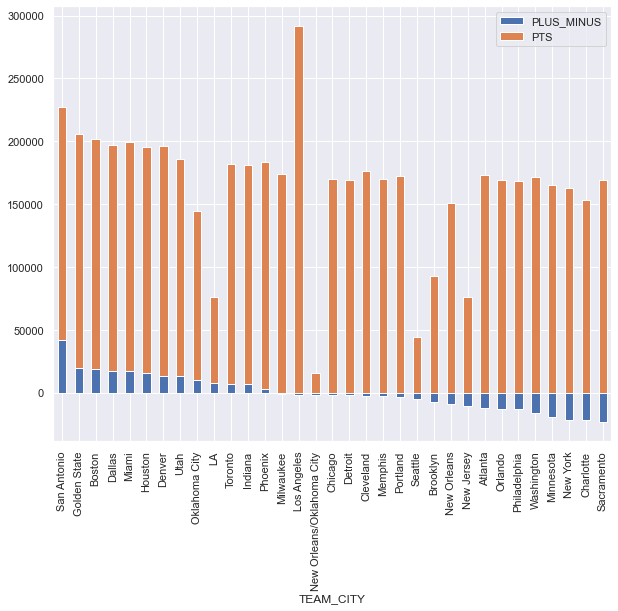

In [92]:
teams[['PLUS_MINUS', 'PTS']].plot(kind='bar',  stacked=True, figsize=(10, 8))

In [89]:
corr_matrix = teams.corr()
corr_matrix.sort_values(by = 'PLUS_MINUS', ascending = False)

,PLUS_MINUS,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLUS_MINUS,1.000000,0.171553,0.167724,0.135040,0.208225,0.275095,0.238893,0.239409,0.136167,0.123948,0.130247,0.075249,0.179116,0.153006,0.185518,0.155029,0.228013,0.114776,0.132171
FG3M,0.275095,0.953220,0.947683,0.943864,0.942077,1.000000,0.997577,0.967313,0.926294,0.918781,0.927385,0.904295,0.949514,0.941191,0.940483,0.928873,0.920777,0.933653,0.932882
FG3_PCT,0.239409,0.986471,0.985829,0.982529,0.987648,0.967313,0.970429,1.000000,0.967622,0.961402,0.977376,0.951937,0.986814,0.981284,0.978592,0.965347,0.965716,0.968925,0.969851
FG3A,0.238893,0.961451,0.955561,0.953824,0.948602,0.997577,1.000000,0.970429,0.940457,0.934187,0.937616,0.919877,0.958478,0.951890,0.947102,0.940696,0.929827,0.945756,0.944235
BLK,0.228013,0.982999,0.983835,0.982190,0.985336,0.920777,0.929827,0.965716,0.977271,0.976493,0.976931,0.971230,0.986254,0.985832,0.982543,0.979263,1.000000,0.978919,0.977106
FG_PCT,0.208225,0.995489,0.996269,0.994274,1.000000,0.942077,0.948602,0.987648,0.985702,0.982838,0.992453,0.976318,0.995786,0.994253,0.993338,0.985033,0.985336,0.985329,0.987594
AST,0.185518,0.994908,0.995741,0.993480,0.993338,0.940483,0.947102,0.978592,0.985369,0.983393,0.989174,0.976898,0.992558,0.991994,1.000000,0.988832,0.982543,0.989626,0.988479
DREB,0.179116,0.997619,0.997390,0.997490,0.995786,0.949514,0.958478,0.986814,0.989570,0.987675,0.990410,0.981781,1.000000,0.998803,0.992558,0.985791,0.986254,0.991812,0.990709
PTS,0.171553,1.000000,0.999529,0.998504,0.995489,0.953220,0.961451,0.986471,0.992287,0.989384,0.991889,0.983050,0.997619,0.997354,0.994908,0.989647,0.982999,0.992930,0.993388
FGM,0.167724,0.999529,1.000000,0.998772,0.996269,0.947683,0.955561,0.985829,0.990195,0.987496,0.992303,0.983526,0.997390,0.997305,0.995741,0.989285,0.983835,0.992251,0.992506


<AxesSubplot:>

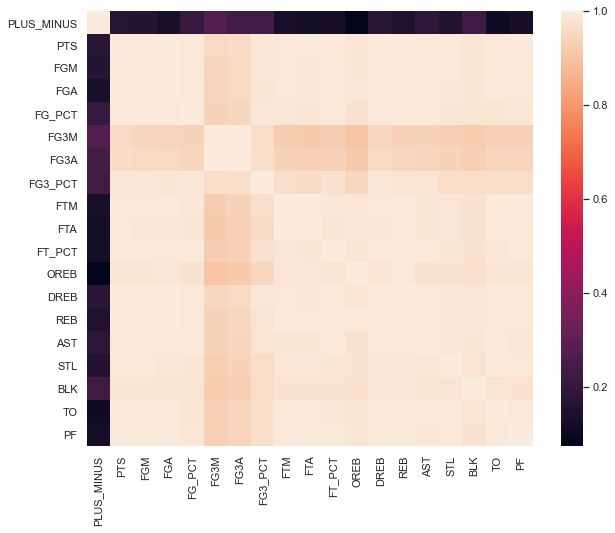

In [90]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix)